## **<font color='darkblue'>Projeto de Processamento de Linguagem Natural - Mineração de Textos</font>**
## **<font color='darkblue'>Livro: "The Great Gatsby" (1925), de Francis Scott Fitzgerald</font>**
## **<font color='darkblue'>Autora do Projeto: Fran Mateus</font>**

#### **<font color='orange'>OBJETIVO DO PROJETO</font>**

Analisar o texto do romance *The Great Gatsby* (O Grande Gatsby) usando técnicas de mineração de textos para identificar insights a partir das palavras escolhidas pelo autor e os sentimentos - positivos ou negativos - associados a essas palavras.

#### **<font color='orange'>METODOLOGIA APLICADA: CRISP-DM</font>**

*Cross Industry Standard Process for Data Mining* (Processo Padrão Inter-Indústrias para Mineração de Dados)

**Etapas:**
- *Business Understanding*: entendimento do problema a ser resolvido;
- *Data Understanding*: entendimento e compreensão dos dados necessários, disponíveis ou a serem coletados externamente;
- *Data Preparation*: mineração do texto disponível para adequá-lo às necessidades da fase de modelagem;
- *Modeling*: modelagem dos dados já tratados com técnicas de Processamento de Linguagem Natural (PLN);
- *Evaluation*: avaliação dos modelos construídos usando técnicas de visualização de dados;
- *Deployment*: implantação do modelo para uso na mineração, análise e/ou modelagem de novos textos.

#### **<font color='orange'>TÉCNICAS DE MINERAÇÃO DE TEXTOS UTILIZADAS</font>**

- *Wordclouds* (Nuvem de Palavras) para decobrir as palavras mais usadas no texto;
- *Análise de Sentimentos* para classificar os sentimentos, *positivo* ou *negativo*, associados a cada palavra;
- *Escore de Sentimentos* para descobrir a intensidade dos sentimentos numa escala de -5 até 5;
- *Word Pairs* (Pares de Palavras) para identificar as conexões - em pares - entre as palavras do texto. 

#### **<font color='orange'>BIBLIOTECAS E FUNÇÕES NECESSÁRIAS</font>**

In [1]:
# Bibliotecas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

# Funções para Wordclouds:
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

# Funções para Análise e Escore de Sentimentos:
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
nltk.download('stopwords', quiet=True)
nltk.download('opinion_lexicon', quiet=True)
nltk.download('punkt', quiet=True)
plt.style.use('ggplot')

# Função para Escore de Sentimentos:
from afinn import Afinn

# Biblioteca e função para Word Pairs:
import networkx as nx
from nltk import ngrams

#### **<font color='orange'>COLETA DOS DADOS TEXTUAIS</font>**

O texto de *The Great Gatsby* encontra-se em domínio público e foi coletado do site Project Gutenberg:
https://www.gutenberg.org/files/64317/64317-h/64317-h.htm

In [2]:
df = pd.read_csv('The-Great-Gatsby-by-FSF/The-Great-Gatsby.txt', sep='\t')\
    .dropna()

df.head()

,text
0,THE GREAT GATSBY by Francis Scott Fitzgerald
1,In my younger and more vulnerable years my fat...
2,that I’ve been turning over in my mind ever si...
3,"“Whenever you feel like criticizing anyone,” h..."
4,remember that all the people in this world hav...


#### **<font color='orange'>MINERAÇÃO DO TEXTO</font>**

#### **<font color='darkblue'>I - WORDCLOUD</font>**

A nuvem de palavras exibirá quais palavras foram mais usadas por Scott Fitzgerald em seu romance. Nela, quanto mais um termo aparecer, maior será o seu tamanho.

#### **Preparação do texto:**

In [3]:
dfw = df

textoFSF = dfw['text']
texto_fitz = " ".join(w for w in textoFSF)
stopwordsw = set(STOPWORDS)

*Stopwords* são palavras consideradas neutras e pouco relevantes para a análise textual; por isso, elas serão excluídas da base de dados.

#### **Criação de wordcloud com todas as palavras do texto, exceto as *stopwords*:**

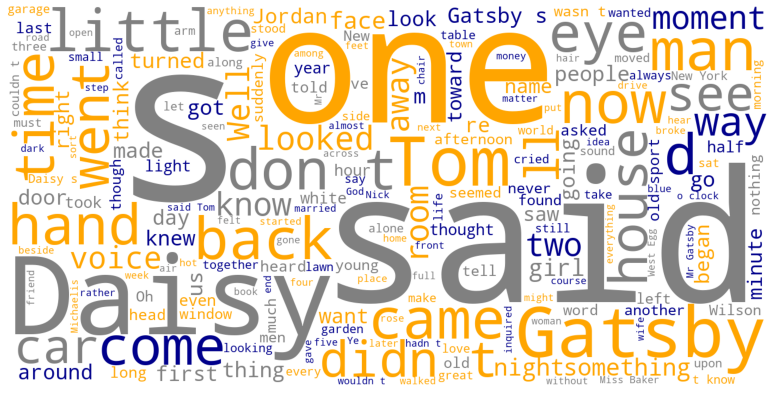

In [4]:
def plot_wordcloud(wordcloud):
    fig, ax = plt.subplots(figsize=(14,7))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_axis_off()
    plt.imshow(wordcloud)      
    
colors = ['darkblue', 'orange', 'gray']
meu_cmap = ListedColormap(sns.color_palette(colors).as_hex())

wordcloud = WordCloud(stopwords=stopwordsw,
                      colormap=meu_cmap,
                      background_color='white',
                      width=1400,
                      height=700).generate(texto_fitz)

plot_wordcloud(wordcloud)

#### **Wordcloud com as 30 palavras mais frequentes:**

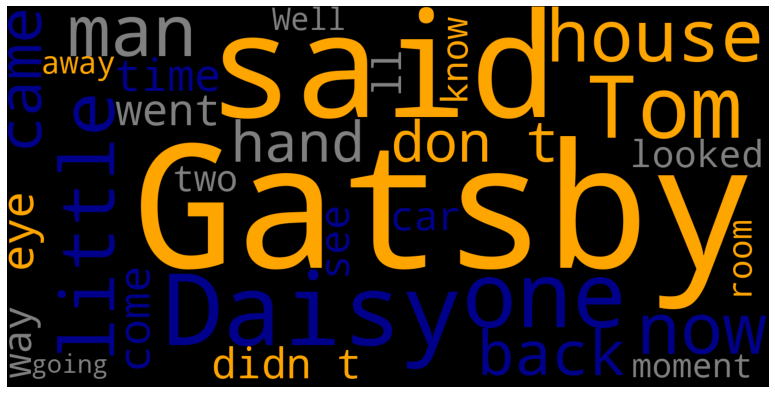

In [5]:
# Remoção de palavras irrelevantes, como letras isoladas presentes no texto:
stopwordsw.update(["m", "us", "S", "d", "re"])

# Limitação da quantidade de palavras para as 30 mais frequentes:
wordcloud = WordCloud(stopwords=stopwordsw,
                      max_words=30,
                      colormap=meu_cmap,
                      background_color='black',
                      width=1400,
                      height=700).generate(texto_fitz)


def plot_wordcloud(wordcloud):
    fig, ax = plt.subplots(figsize=(14,7))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_axis_off()
    plt.imshow(wordcloud)

    
colors = ['blue', 'orange', 'gray']
meu_cmap = ListedColormap(sns.color_palette(colors).as_hex())


plot_wordcloud(wordcloud)

#### **<font color='orange'>Insights:</font>** 
A wordcloud nos permitiu ter um primeiro contato visual com o texto de *The Great Gatsby*. Através dela, descobrimos que as palavras mais usadas pelo autor foram:

- nomes de pessoas (*Gatsby, Daisy e Tom*); 
- verbos no passado (*said, came, went, didn´t, looked*) e no presente (*come, see, don´t, know*); 
- muitos substantivos (*house, eye, time, car, hand, room e moment*);
- além de adjetivos (como *little*) e advébios (como *well e now*). 

Combinados, esses termos nos dão a ideia de que esse texto pode ser um romance literário ou (para quem ainda não conhece essa obra de Fitzgerald) que poderia ser a biografia de alguém chamado Gatsby.

#### **<font color='darkblue'>II - ANÁLISE DE SENTIMENTOS USANDO OPINION LEXICON</font>**

A análise de sentimentos é uma técnica que permite a rápida identificação de opiniões e intenções de um autor para com o seu texto através da classificação da polaridade das palavras contidas nele em *positivas*, *negativas* ou *neutras*.

#### **Preparação do texto:**

In [6]:
df1 = df

# Limpeza e tokenização:
def clean_text(text):
    text = text.lower()
    text = text.replace("'", '')
    text = re.sub(r'[^\w]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

df1['text'] = df1['text'].map(clean_text) 
df1['text'] = df1['text'].map(word_tokenize)

df1.head()

,text
0,"[the, great, gatsby, by, francis, scott, fitzg..."
1,"[in, my, younger, and, more, vulnerable, years..."
2,"[that, i, ve, been, turning, over, in, my, min..."
3,"[whenever, you, feel, like, criticizing, anyon..."
4,"[remember, that, all, the, people, in, this, w..."


In [7]:
df2 = df1.text.explode().to_frame('token')
df2.head()

,token
0,the
0,great
0,gatsby
0,by
0,francis


In [8]:
# Quantidade de palavras por token:
df2.token.value_counts().head()

the    2400
and    1569
a      1412
i      1390
to     1130
Name: token, dtype: int64

Nota-se que as palavras consideradas *stopwords* (por exemplo, os artigos definido *the* e indefinido *a*) dominam o texto. Por não serem informativas ou relevantes para a análise textual, elas serão removidas da base de dados.

In [9]:
df2.shape

(49948, 1)

In [10]:
# Remoção das stopwords:
stopwords_a = set(stopwords.words('english'))

df2 = df2[~df2.token.isin(stopwords_a)]

df2.token.value_counts().head()

gatsby    264
said      235
tom       191
daisy     186
one       152
Name: token, dtype: int64

In [11]:
df2.shape

(23596, 1)

Com a exclusão das *stopwords*, a quantidade de palavras foi reduzida em 53%, passando de 49.948 para 23.596 termos.

#### **Classificação binária dos sentimentos:**

In [12]:
sentiment_lexicon = {
    **{w: 'positivo' for w in opinion_lexicon.positive()},
    **{w: 'negativo' for w in opinion_lexicon.negative()}
}

df2['sentiment'] = df2['token'].map(sentiment_lexicon)
df2 = df2[~df2.sentiment.isna()] 

df2.head()

,token,sentiment
0,great,positivo
1,vulnerable,negativo
3,like,positivo
3,criticizing,negativo
4,advantages,positivo


Nota-se que existe coerência na classificação das palavras acima de acordo com o sentimento que elas representam. Por exemplo, *great* (grande) e *advantages* (vantagens) têm conotação positiva, enquanto que *vulnerable* (vulnerável) e *criticizing* (criticando) refletem sentimentos negativos.

In [13]:
# Quantidade de palavras por token:
df2.token.value_counts().head()

like     122
well      70
right     50
miss      38
good      30
Name: token, dtype: int64

In [14]:
# Quantidade e proporção de cada sentimento:
summary_df2 = df2.sentiment.value_counts().to_frame('n')
summary_df2['prop'] = summary_df2['n'] / summary_df2.n.sum()

summary_df2.round(3)

,n,prop
negativo,1545,0.55
positivo,1262,0.45


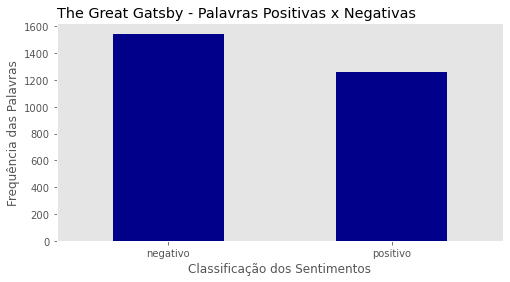

In [15]:
# Visualização gráfica da classificação binária de sentimentos:
summary_df2.n.plot.bar(legend=False, figsize=(8, 4), grid=False, color='darkblue')
plt.xlabel('Classificação dos Sentimentos')
plt.ylabel('Frequência das Palavras')
plt.title('The Great Gatsby - Palavras Positivas x Negativas', loc='left')
plt.xticks(rotation=0);

#### **<font color='orange'>Insights:</font>** 
- *The Great Gatsby* possui 55% de seu texto constituido de palavras negativas contra 45% de palavras positivas. Essa informação nos permite deduzir que essa é uma história com tendência para o drama. 
- Para melhorar essa análise, criaremos um escore de sentimentos.

#### **<font color='darkblue'>III - ESCORE DE SENTIMENTOS USANDO AFINN</font>**

A escoragem dos sentimentos nos permite entender o quanto as palavras de um texto são positivas ou negativas; ou seja, a força do sentimento aplicado a cada uma delas. Para isso, usaremos a função AFINN, que medirá a intensidade das palavras numa escala que varia de -5 (muito negativa) até 5 (muito positiva).

#### **Criação do escore de sentimentos das palavras:**

In [16]:
# Adicionando linhas numeradas para divisão do texto em seções:
df2['line'] = range(1, len(df2) + 1)

df2.head()

,token,sentiment,line
0,great,positivo,1
1,vulnerable,negativo,2
3,like,positivo,3
3,criticizing,negativo,4
4,advantages,positivo,5


In [17]:
afinn_scorer = Afinn()

# Exclusão das palavras com escore 0 (neutro).
df2['score'] = df2['token'].map(afinn_scorer.score).astype(int)
df2 = df2[df2['score'] != 0]

score_freq = df2.score.value_counts().sort_index().to_frame('n')

score_freq

,n
-5,4
-4,8
-3,151
-2,447
-1,153
1,109
2,366
3,251
4,30


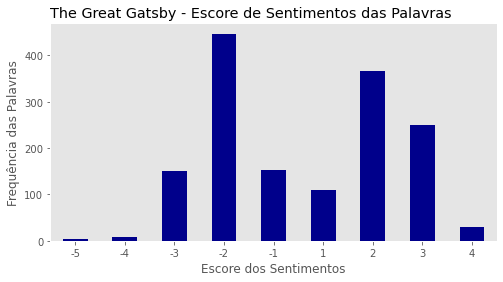

In [18]:
# Visualização gráfica do escore de sentimentos das palavras:
score_freq.plot.bar(
    legend=False,
    figsize=(8, 4),
    grid=False,
    color='darkblue')
plt.xlabel('Escore dos Sentimentos')
plt.ylabel('Frequência das Palavras')
plt.title('The Great Gatsby - Escore de Sentimentos das Palavras', loc='left')
plt.xticks(rotation=0);

O gráfico mostra a predominância de palavras nos escores -2 e 2 e 3, indicando a presença de sentimentos conflituosos, mas relativamente moderados na narrativa, quando consideramos que a escala geral do escore varia de -5 até 5.

#### **Escore de sentimentos do Arco Narrativo da estória**

Um gráfico do escore de sentimentos do Arco Narrativo nos permitirá visualizar como que o texto, em termos de distribuição de palavras negativas e positivas, foi desenvolvido.

In [19]:
# Divisão do texto em seções de 100 linhas/cada:
score_acc = df2.groupby(df2['line'] // 100)\
    .score.mean()\
    .to_frame('score')\
    .rename_axis('section')

score_acc.head(10)

,score
section,
0,0.866667
1,0.189655
2,-0.867925
3,0.444444
4,-0.204545
5,-0.016129
6,0.714286
7,0.900000
8,-0.108696


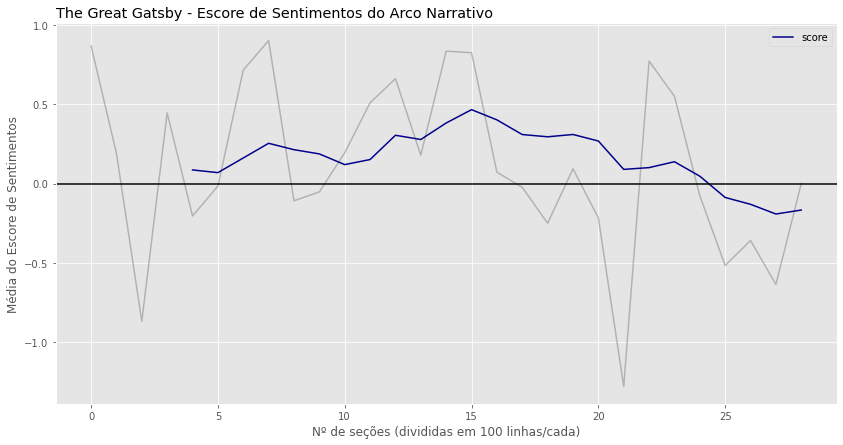

In [20]:
# Visualização gráfica do escore de sentimentos ao longo do arco narrativo:
ax = score_acc.plot.line(legend=False, figsize=(14, 7), grid=False, alpha=0.5, color='gray')
score_acc.rolling(10, min_periods=5).mean().plot.line(ax=ax, color='darkblue')
plt.xlabel('Nº de seções (divididas em 100 linhas/cada)')
plt.ylabel('Média do Escore de Sentimentos')
plt.title('The Great Gatsby - Escore de Sentimentos do Arco Narrativo', loc='left')
plt.axhline(0, color='black')
plt.xticks(rotation=0);

No gráfico:
- A **linha vermelha** delimita o ponto 0.0 e separa o escore positivo do negativo.

- A **linha cinza** representa a média do escore de sentimento de cada seção (com 100 linhas de texto/cada) e mostra que Fitzgerald mesclou o uso das palavras positivas e negativas, continuamente, ao longo de todo o seu texto;

- A **linha azul** representa a média móvel do escore das mais de 25 seções exibidas no gráfico. Ela começou positiva (com escore entre 0.0 e 0.25) e assim se manteve até a seção 24, aproximadamente. A partir de então, o texto assumiu escores negativos até o seu final.

#### **<font color='orange'>Insights:</font>** 
- Combinando análise e escore de sentimentos do texto de Fitzgerald, pode-se observar que os 45% de palavras positivas usadas por ele, cujos escores variam de 1 a 4, foram concentrados nos dois terços iniciais do arco narrativo (seções 0 - 24). 
- Quanto aos 55% de palavras negativas (com destaque para o escore -2, o mais alto de todos), mesmo presentes ao longo do texto, elas se mostraram mais fortes da seção 24 até final, indicando uma conclusão dramática para *The Great Gatsby*.

#### **<font color='darkblue'>IV - PARES DE PALAVRAS USANDO NETWORKX</font>**

A técnica de *Pares de Palavras*, também chamada de *Bigramas*, é usada na descoberta de associações entre as palavras de um texto, dando uma ideia de como as suas frases foram construídas.

#### **Criação dos pares de palavras:**

In [21]:
df4 = df1

# Agrupando as palavras em duplas:
df4['wordpairs'] = df4['text'].map(lambda x: list(ngrams(x, 2)))
df4 = df4.explode('wordpairs')

df4.head()

,text,wordpairs
0,"[the, great, gatsby, by, francis, scott, fitzg...","(the, great)"
0,"[the, great, gatsby, by, francis, scott, fitzg...","(great, gatsby)"
0,"[the, great, gatsby, by, francis, scott, fitzg...","(gatsby, by)"
0,"[the, great, gatsby, by, francis, scott, fitzg...","(by, francis)"
0,"[the, great, gatsby, by, francis, scott, fitzg...","(francis, scott)"


In [22]:
# Frequência dos pares de palavras:
df4['wordpairs'].value_counts().head(6)

(of, the)     214
(in, the)     200
(on, the)     136
(it, was)     134
(and, the)    115
(in, a)       112
Name: wordpairs, dtype: int64

In [23]:
# Separando as palavras em 2 colunas para remoção de stopwords: 
df4 = pd.DataFrame(df4.wordpairs.values.tolist(), columns=['word1', 'word2']).dropna()

# Remoção das stopwords:
en_stopwords = set(stopwords.words('english'))

df4 = df4[~(df4.word1.isin(en_stopwords) | df4.word2.isin(en_stopwords))]

df4.head()

,word1,word2
1,great,gatsby
4,francis,scott
5,scott,fitzgerald
11,vulnerable,years
14,father,gave


In [24]:
# Classificando os pares de palavras pela frequência delas no texto:
df4 = df4.groupby(['word1', 'word2'])\
    .size()\
    .to_frame('n')\
    .reset_index()\
    .sort_values('n', ascending=False)

In [25]:
# Restrigindo os pares para as palavras que aparecem mais de 10 vezes juntas:
df4[df4.n > 10].head(10)

,word1,word2,n
4237,old,sport,42
4057,new,york,32
3794,miss,baker,25
5032,said,tom,24
6525,west,egg,23
3887,mr,gatsby,22
3907,mrs,wilson,19
3900,mr,wolfshiem,17
4995,said,gatsby,16
5966,tom,buchanan,15


#### **Visualização gráfica dos pares de palavras:**

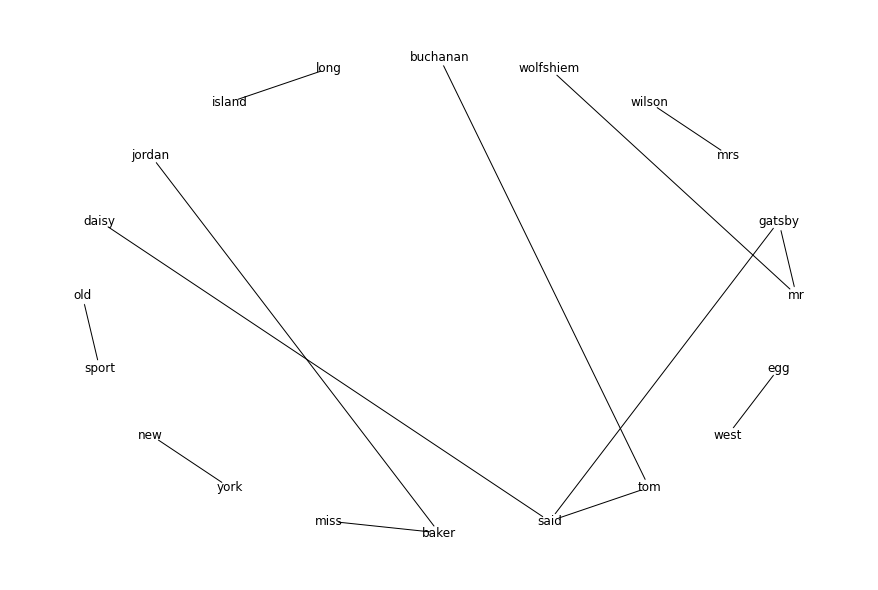

In [26]:
Conexoes = nx.from_pandas_edgelist(df4[df4.n > 10], 'word1', 'word2')
plt.figure(figsize=(12, 8))
nx.draw_shell(Conexoes, with_labels=True, node_color='white', font_size=12)

#### **<font color='orange'>Insights:</font>** 
- Entre os 5 bigramas mais frequentes nesta obra, destacam-se *Old Sport* (expressão muito usada por Gatsby e associada à figura do próprio Fitzgerald), *New York* (onde o Nick Carraway, o narrador da história, trabalha e onde acontecem alguns momentos importantes da trama) e *West Egg* (onde a mansão de Gatsby e a casa de Nick estão localizadas).